<a href="https://colab.research.google.com/github/Cheetah-lhp/MachineLearning/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0 0 0 ... 2 2 2]


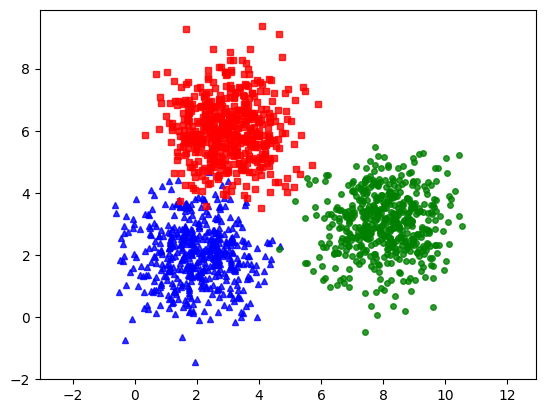

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial. distance import cdist # cdist tinh' khoang? cach giua cac cap diem? trong 2 tap hop 1 cach hieu qua?
np.random.seed(11)

means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0, 1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3

original_label = np.asarray([0]*N + [1]*N + [2]*N).T
print(original_label)
def kmeans_display(X, label):
  K = np.amax(label) + 1
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]

  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

  plt.axis('equal')
  plt.plot()
  plt.show()

def kmeans_display_with_centers(X, label, centers):
  K = np.amax(label) + 1
  X0 = X[label == 0, :]
  X1 = X[label == 1, :]
  X2 = X[label == 2, :]

  plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
  plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

  plt.plot(centers[:, 0], centers[:, 1], 'y*')

  plt.axis('equal')
  plt.plot()
  plt.show()

kmeans_display(X, original_label)



Centers found by our algorithm
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


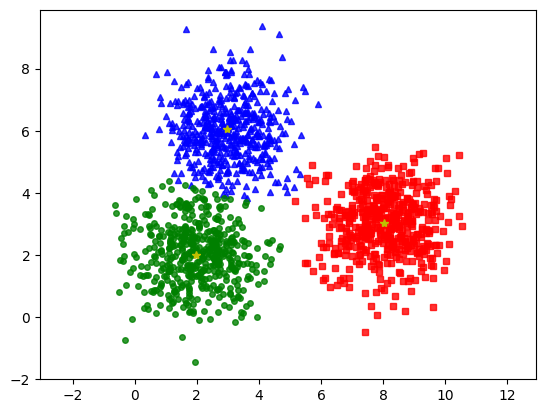

In [ ]:
def kmeans_init_centers(X, k):
  return X[np.random.choice(X.shape[0], k, replace=False)]
  # chon phan tu 0 trong X phan tu 2 chieu, k la so centers muon chon, replace false nghia la khong bi chon trung`, true la co the chon trung`

def kmeans_assign_labels(X, centers):
  D = cdist(X, centers) # ham tinh khoang? cach' tu cac centers den X diem? con` lai.
  return np.argmin(D, axis = 1) #argmin la` ham` tra? ve` index ung voi k/c nho? nhat' ung' voi tung` diem?

def kmeans_update_centers(X, labels, K):
  centers = np.zeros((K, X.shape[1]))
  for k in range(K):
    Xk = X[labels == k, :]
    centers[k, :] = np.mean(Xk, axis = 0) #mean la ham tinh trung binh gia tri cac diem
  return centers

def has_converged(centers, new_centers): # tra? ve dung' neu 2 set cua? center la giong nhau
  return (centers == new_centers).all()

def kmeans(X, K):
  centers = [kmeans_init_centers(X, K)]
  labels = []
  it = 0
  while True:
    labels.append(kmeans_assign_labels(X, centers[-1]))
    new_centers = kmeans_update_centers(X, labels[-1], K)
    if has_converged(centers[-1], new_centers):
      break
    centers.append(new_centers)
    it+=1
  return (centers, labels, it)

(centers, labels, it) = kmeans(X, K)
print('Centers found by our algorithm')
print(centers[-1])

kmeans_display_with_centers(X, labels[-1], centers[-1])
